In [1]:
import os
import json

def load_results(folder):
    results_list = []
    for file_name in os.listdir(folder):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder, file_name)
            with open(file_path, 'r') as f:
                results = json.load(f)
                results_list.append(results)
    return results_list

results_folder = "grid_search_results"
all_results = load_results(results_folder)

[   0    0  103  103    0 -103 -103    0  103  207  207  207  103    0
 -103 -207 -207 -207 -103] [   0  120   60  -59 -120  -60   60  240  180  120    0 -119 -180 -240
 -180 -120    0  119  179]


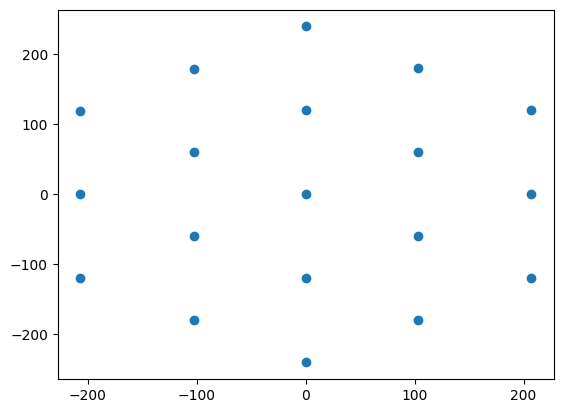

{'l': 2, 'm': 2, 'di': 0.75, 'dz': 50, 'mesh_shape': [935, 935], 'njack': 1.4345, 'nclad': 1.44, 'ncore': 1.4522895, 'sm_rcore': 6.5, 'sm_rclad': 32.8, 'taper_ratio': 10, 'sm_seperation_final': 120, 'sm_offset': 500, 'sm_ex': 40000}


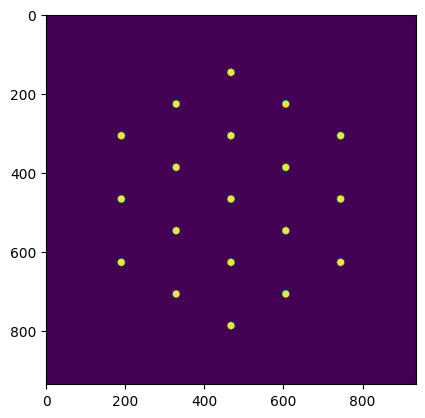

(935, 935)
di: 0.75, dz: 50, runtime: 919.2010307312012, power: [5.277347188466024e-05, 0.00430288565685373, 0.0011038014028925032, 0.001103801402892421, 0.004302885656853748, 0.0011038014028924579, 0.0011038014028925363, 0.00037535901467258294, 7.609483202748708e-05, 0.00012068574641676713, 0.0004570152419281002, 0.00012068574641675981, 7.60948320274812e-05, 0.000375359014672561, 7.609483202748553e-05, 0.00012068574641677274, 0.0004570152419281009, 0.00012068574641675421, 7.609483202748301e-05]
{'l': 2, 'm': 2, 'di': 0.75, 'dz': 50, 'mesh_shape': [935, 935], 'njack': 1.4345, 'nclad': 1.44, 'ncore': 1.4522895, 'sm_rcore': 6.5, 'sm_rclad': 32.8, 'taper_ratio': 10, 'sm_seperation_final': 120, 'sm_offset': 500, 'sm_ex': 40000}
[[ 1.11889081e-98 -1.95482823e-85 -5.01748103e-85 ... -5.01748103e-85
  -1.95482823e-85  1.11889081e-98]
 [ 1.95482823e-85  1.83994218e-98 -3.22265682e-85 ... -3.22265682e-85
   1.83994218e-98  1.95482823e-85]
 [ 5.01748103e-85  3.22265682e-85  3.02567349e-98 ...  3

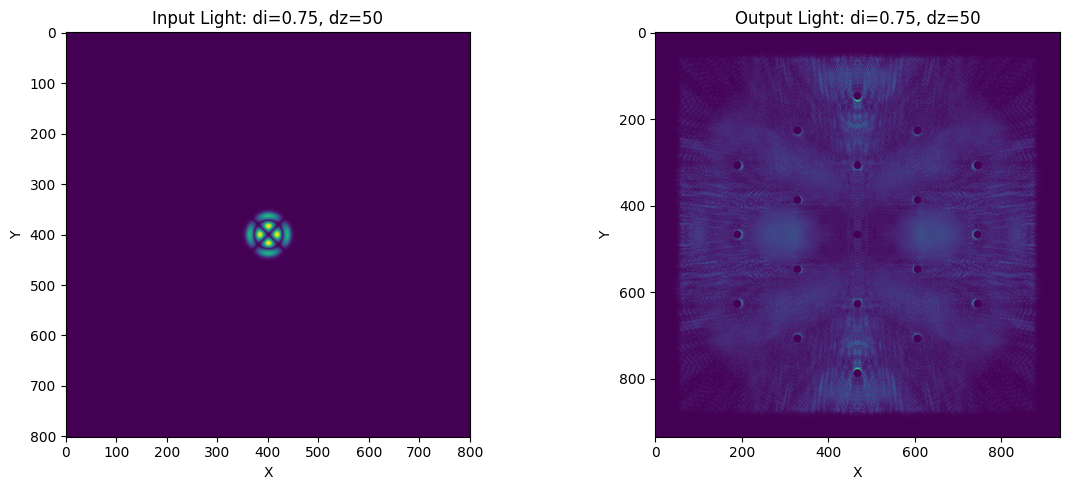

In [3]:
import numpy as np
import sys
sys.path.append("../src")
import lightbeam
from lightbeam.mesh import RectMesh3D, RectMesh2D
from lightbeam.prop import Prop3D
from lightbeam.misc import normalize,overlap_nonu,norm_nonu
from lightbeam import LPmodes
import matplotlib.pyplot as plt
from config_example import *

iw0 = 600
num_PML = int(round(iw0 / 9))
sm_rcore = 6.5 # um
sm_seperation_final = 2*60 # um


lant19_fpos = optics.lant19.get_19port_positions(core_spacing=sm_seperation_final)
print((lant19_fpos[:,1]).astype('int32'),(lant19_fpos[:,0]).astype('int32'))
plt.scatter((lant19_fpos[:,1]).astype('int32'),(lant19_fpos[:,0]).astype('int32'))
plt.show()

elmnts = []
for i in range(0,len(lant19_fpos)):
    core = optics.scaled_cyl(xy=lant19_fpos[i] ,r = sm_rcore,z_ex = 1,n = 1,nb = 1,z_offset=0)
    elmnts.append(core)

optic = optics.OpticSys(elmnts,0)

for result in all_results:
    di = result["di"]
    dz = result["dz"]
    initial_conditions = result["initial_conditions"]
    input_light_real = result["input_light_real"]
    input_light_imag = result["input_light_imag"]
    powers = result["powers"]
    abs_u0_final_positions = result["abs_u0_final_positions"]
    outputs_real = result["outputs_real"]
    outputs_imag = result["outputs_imag"]
    runtime = result["runtimes"]
    mesh = RectMesh2D(iw0,iw0, initial_conditions["di"],initial_conditions["di"], num_PML)
    optic.set_sampling(mesh)
    print(initial_conditions)
    mask = np.zeros(initial_conditions["mesh_shape"])
    optic.set_IORsq(mask,1)
    mask = mask.astype('int')
    plt.imshow(mask)
    plt.show()
    print(mask.shape)
    # lant19_fpos[:,0] = lant19_fpos[:,0] + initial_conditions["mesh_shape"][1]//2
    # lant19_fpos[:,1] = lant19_fpos[:,1] + initial_conditions["mesh_shape"][0]//2
    # for fpos in lant19_fpos:
    #     x_center, y_center = fpos.astype('int')
    #     for x in range(x_center - int(sm_rcore), x_center + int(sm_rcore) + 1):
    #         for y in range(y_center - int(sm_rcore), y_center + int(sm_rcore) + 1):
    #             if 0 <= x < out.shape[0] and 0 <= y < out.shape[1]:
    #                 if (x - x_center) ** 2 + (y - y_center) ** 2 <= sm_rcore:
    #                     out[x, y] = 1000
    # plt.imshow(out)
    # plt.show()
    # plt.scatter((lant19_fpos[:,1]).astype('int32'),(lant19_fpos[:,0]).astype('int32'))
    # plt.show()
    # Perform your analysis here
    print(f"di: {di}, dz: {dz}, runtime: {runtime}, power: {powers}")
    print(initial_conditions)
    
    input_light_real = np.array(input_light_real)
    input_light_imag = np.array(input_light_imag)
    outputs_real = np.array(outputs_real)
    outputs_imag = np.array(outputs_imag)
    print(input_light_real)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Input Light: di={di}, dz={dz}")
    plt.imshow(np.sqrt(input_light_real**2 + input_light_imag**2))
    plt.xlabel('X')
    plt.ylabel('Y')
    
    amplitude = np.sqrt(outputs_real**2 + outputs_imag**2)
    print(np.sum(amplitude))
    print(amplitude.shape)
    amplitude[mask == 1] = 0
    print(amplitude.shape)
    print(np.sum(amplitude))
    plt.subplot(1, 2, 2)
    plt.title(f"Output Light: di={di}, dz={dz}")
    plt.imshow(amplitude)
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.tight_layout()
    plt.show()